# Load checkpoint and imports

In [1]:
import sys
import warnings

warnings.filterwarnings('ignore') 
parent_dir="/Volumes/work/phd/MoLFormer_N2024"
sys.path.append(parent_dir)


In [2]:
import pandas as pd
from utils.util_alignment import set_seeds
from utils.visualization_helper import *  
import matplotlib.pyplot as plt
from constants import *
plt.rc('font',**{'family':'serif','serif':['Calibri']})


base


In [3]:
base_path= '../../../../T5 EVO/alignment_olfaction_datasets/'
results_path = 'curated_datasets/dfs_result/regression/'

In [4]:
seed = 2024
set_seeds(seed)

In [5]:
times=30
n_components=20

# Helper Methods

In [6]:
def normalize_rmse(df,min_max,j):
    max_values = min_max.max()
    min_values = min_max.min()
    min_max.columns = ['Dataset','Type']+df.columns.values.tolist()[:j]
    # Drop 'Dataset' and 'Type' as they are not numeric columns
    min_values = min_values.drop(['Dataset', 'Type'])
    max_values = max_values.drop(['Dataset', 'Type'])
    for i,col in enumerate(df.columns[:j]):
        df[col] = np.sqrt(df[col]) / (max_values[i] - min_values[i])
    return df

# Extracting Representations

## Keller

In [7]:
input_file_keller = base_path+'curated_datasets/mols_datasets/curated_keller2016_nona.csv' # or new downloaded file path
df_keller_temp=pd.read_csv(input_file_keller)

In [8]:
df_keller_cor_pom=pd.read_csv(base_path+results_path+"df_keller_cor_pom.csv")
df_keller_mse_pom=pd.read_csv(base_path+results_path+"df_keller_mse_pom.csv")
df_keller_cor_alva=pd.read_csv(base_path+results_path+"df_keller_cor_alva.csv")
df_keller_mse_alva=pd.read_csv(base_path+results_path+"df_keller_mse_alva.csv")
df_keller_corrs_molfomer=pd.read_csv(base_path+results_path+"df_keller_corrs_molfomer.csv")
df_keller_mses_molfomer=pd.read_csv(base_path+results_path+"df_keller_mses_molfomer.csv")
df_keller_corrs_molfomerfinetuned=pd.read_csv(base_path+results_path+"df_keller_corrs_molfomerfinetuned.csv")
df_keller_mses_molfomerfinetuned=pd.read_csv(base_path+results_path+"df_keller_mses_molfomerfinetuned.csv")

In [9]:
min_max_keller = pd.read_csv(base_path+results_path+"keller_min_max.csv")
df_keller_mse_pom=normalize_rmse(df_keller_mse_pom,min_max_keller,j=-1)
df_keller_mse_alva=normalize_rmse(df_keller_mse_alva,min_max_keller,j=-1)
df_keller_mses_molfomer=normalize_rmse(df_keller_mses_molfomer,min_max_keller,j=-2)
df_keller_mses_molfomerfinetuned=normalize_rmse(df_keller_mses_molfomerfinetuned,min_max_keller,j=-2)

['molformer', 'molformerfinetuned', 'pom', 'alva']


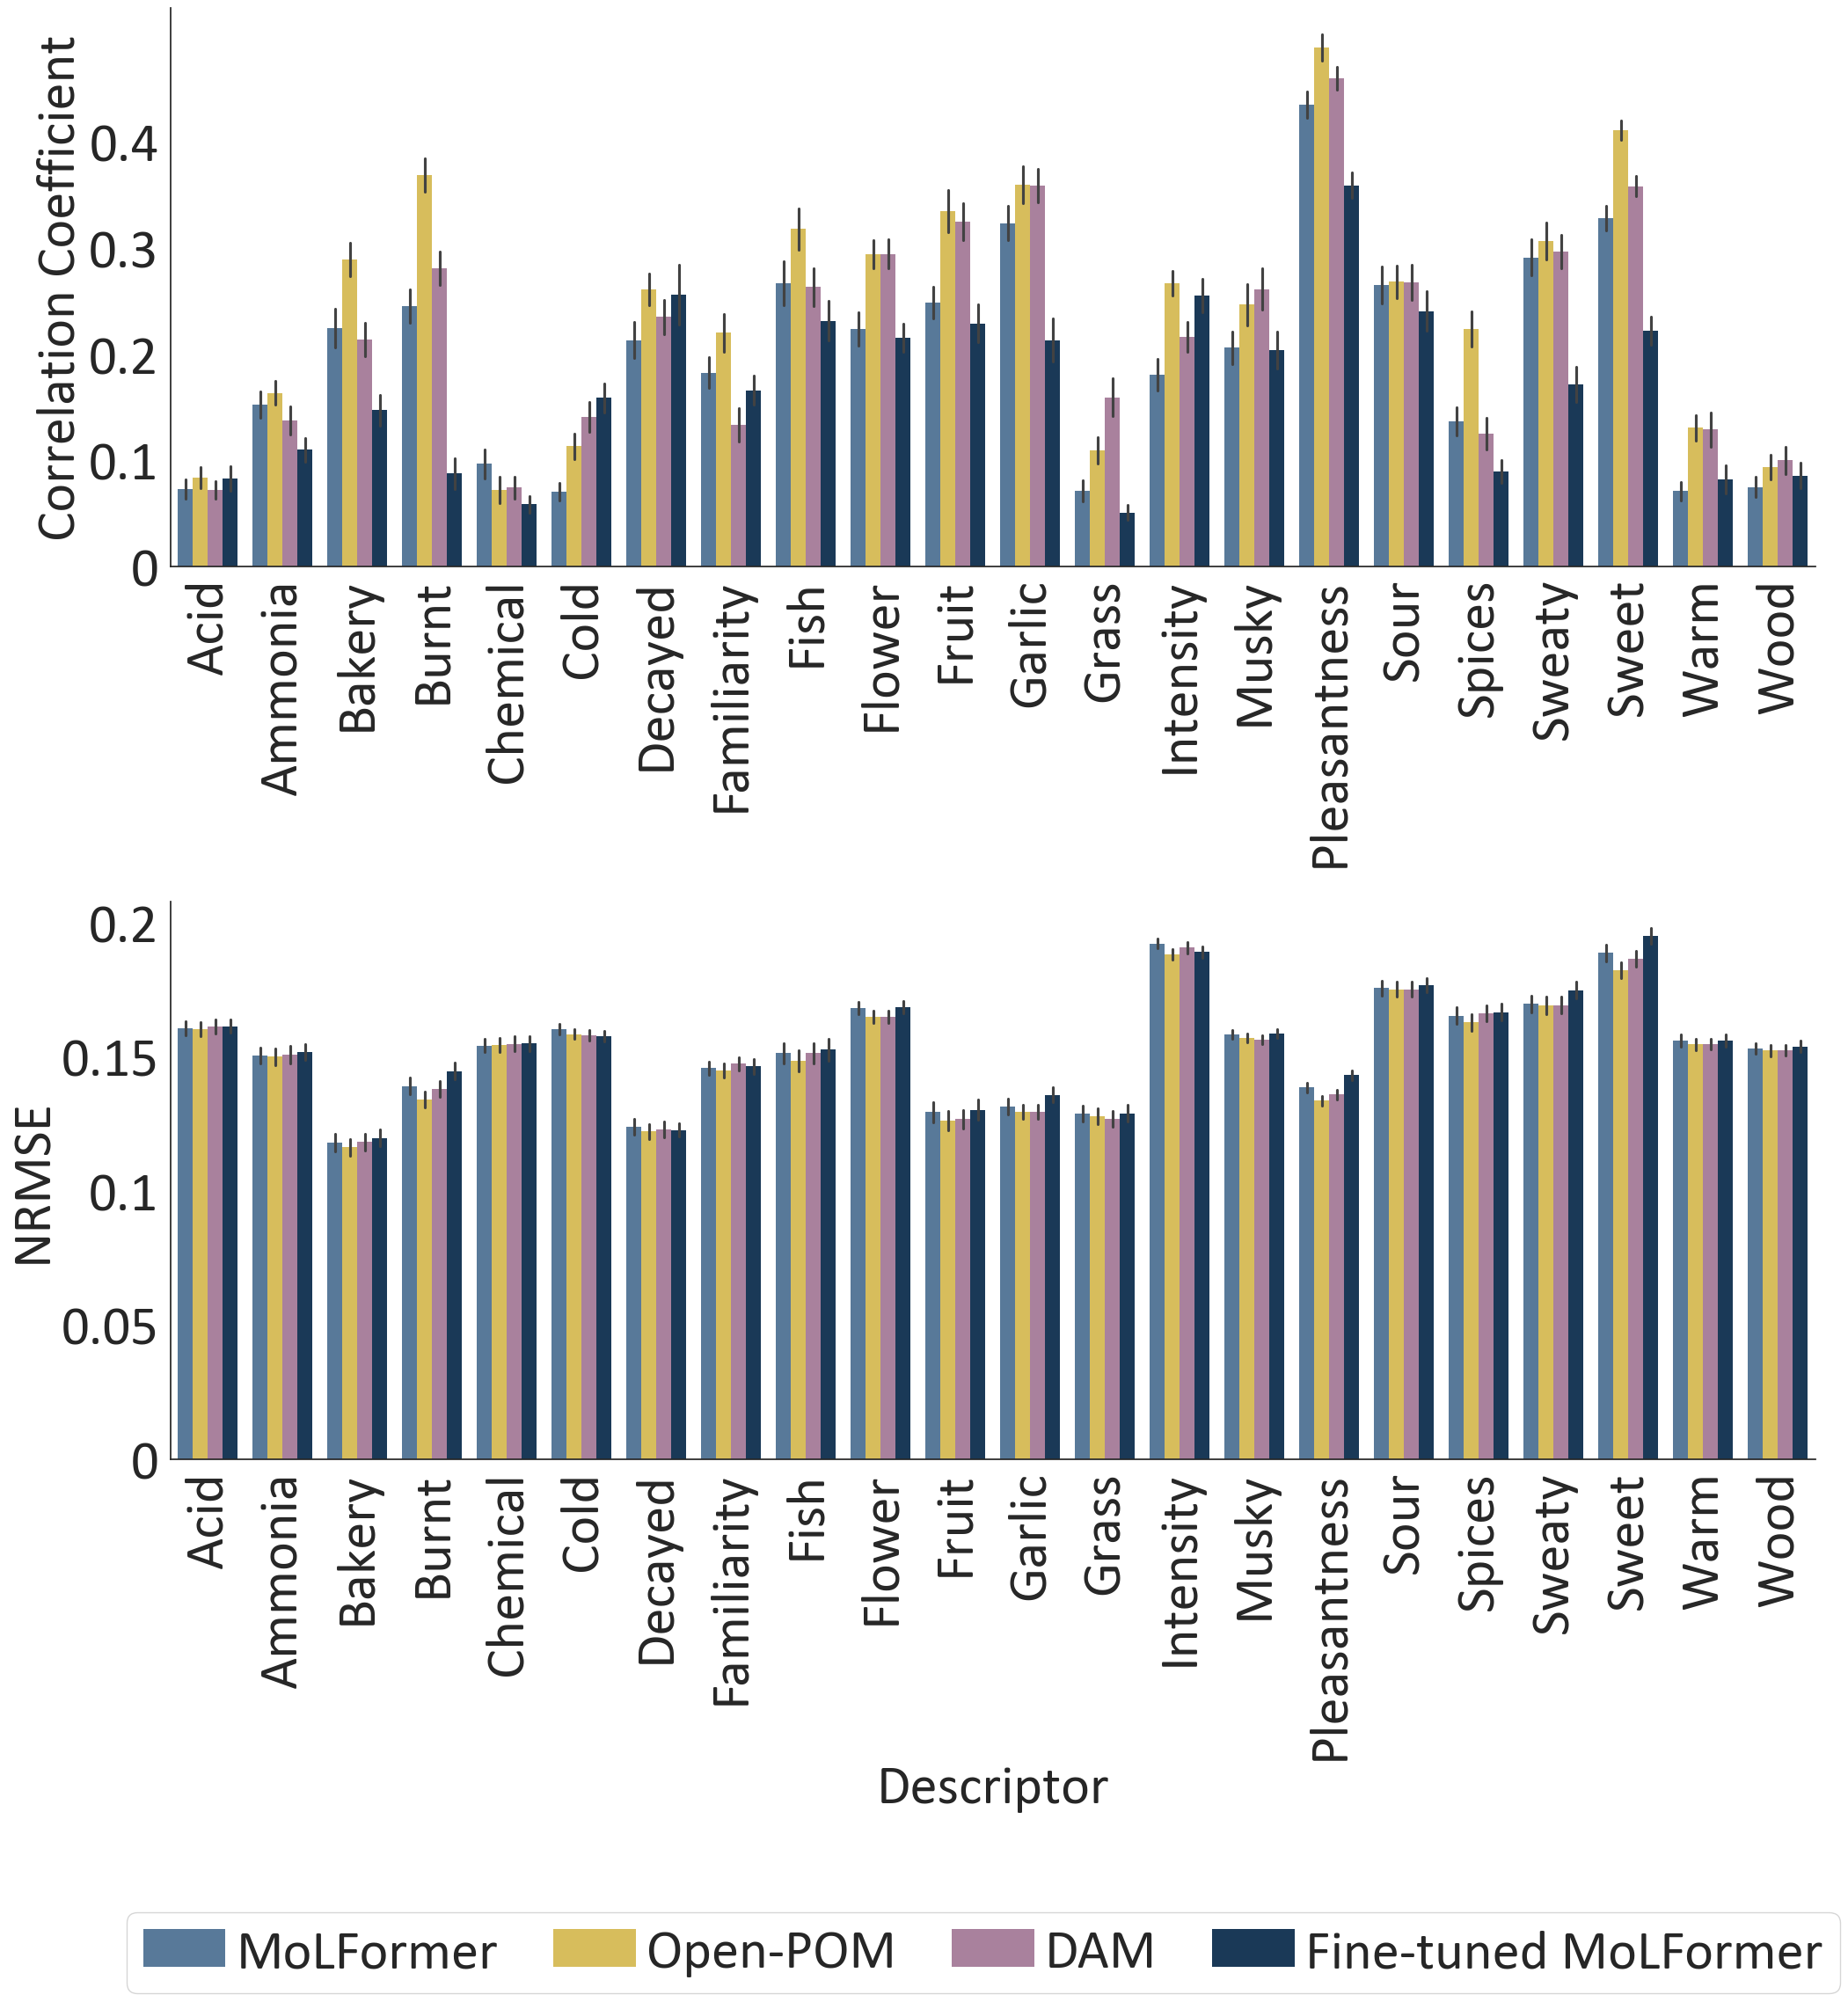

In [10]:
trend_learning_molformer =  post_process_dataframe(df_keller_corrs_molfomer,df_keller_mses_molfomer,df_keller_corrs_molfomerfinetuned,df_keller_mses_molfomerfinetuned,df_keller_cor_pom,df_keller_mse_pom,df_keller_cor_alva,df_keller_mse_alva,keller_tasks,"figs/camera_ready/keller_regression_finetune",width=None,linewidth=0)
# trend_learning_molformer['dataset']='keller'

['molformer', 'pom', 'alva']


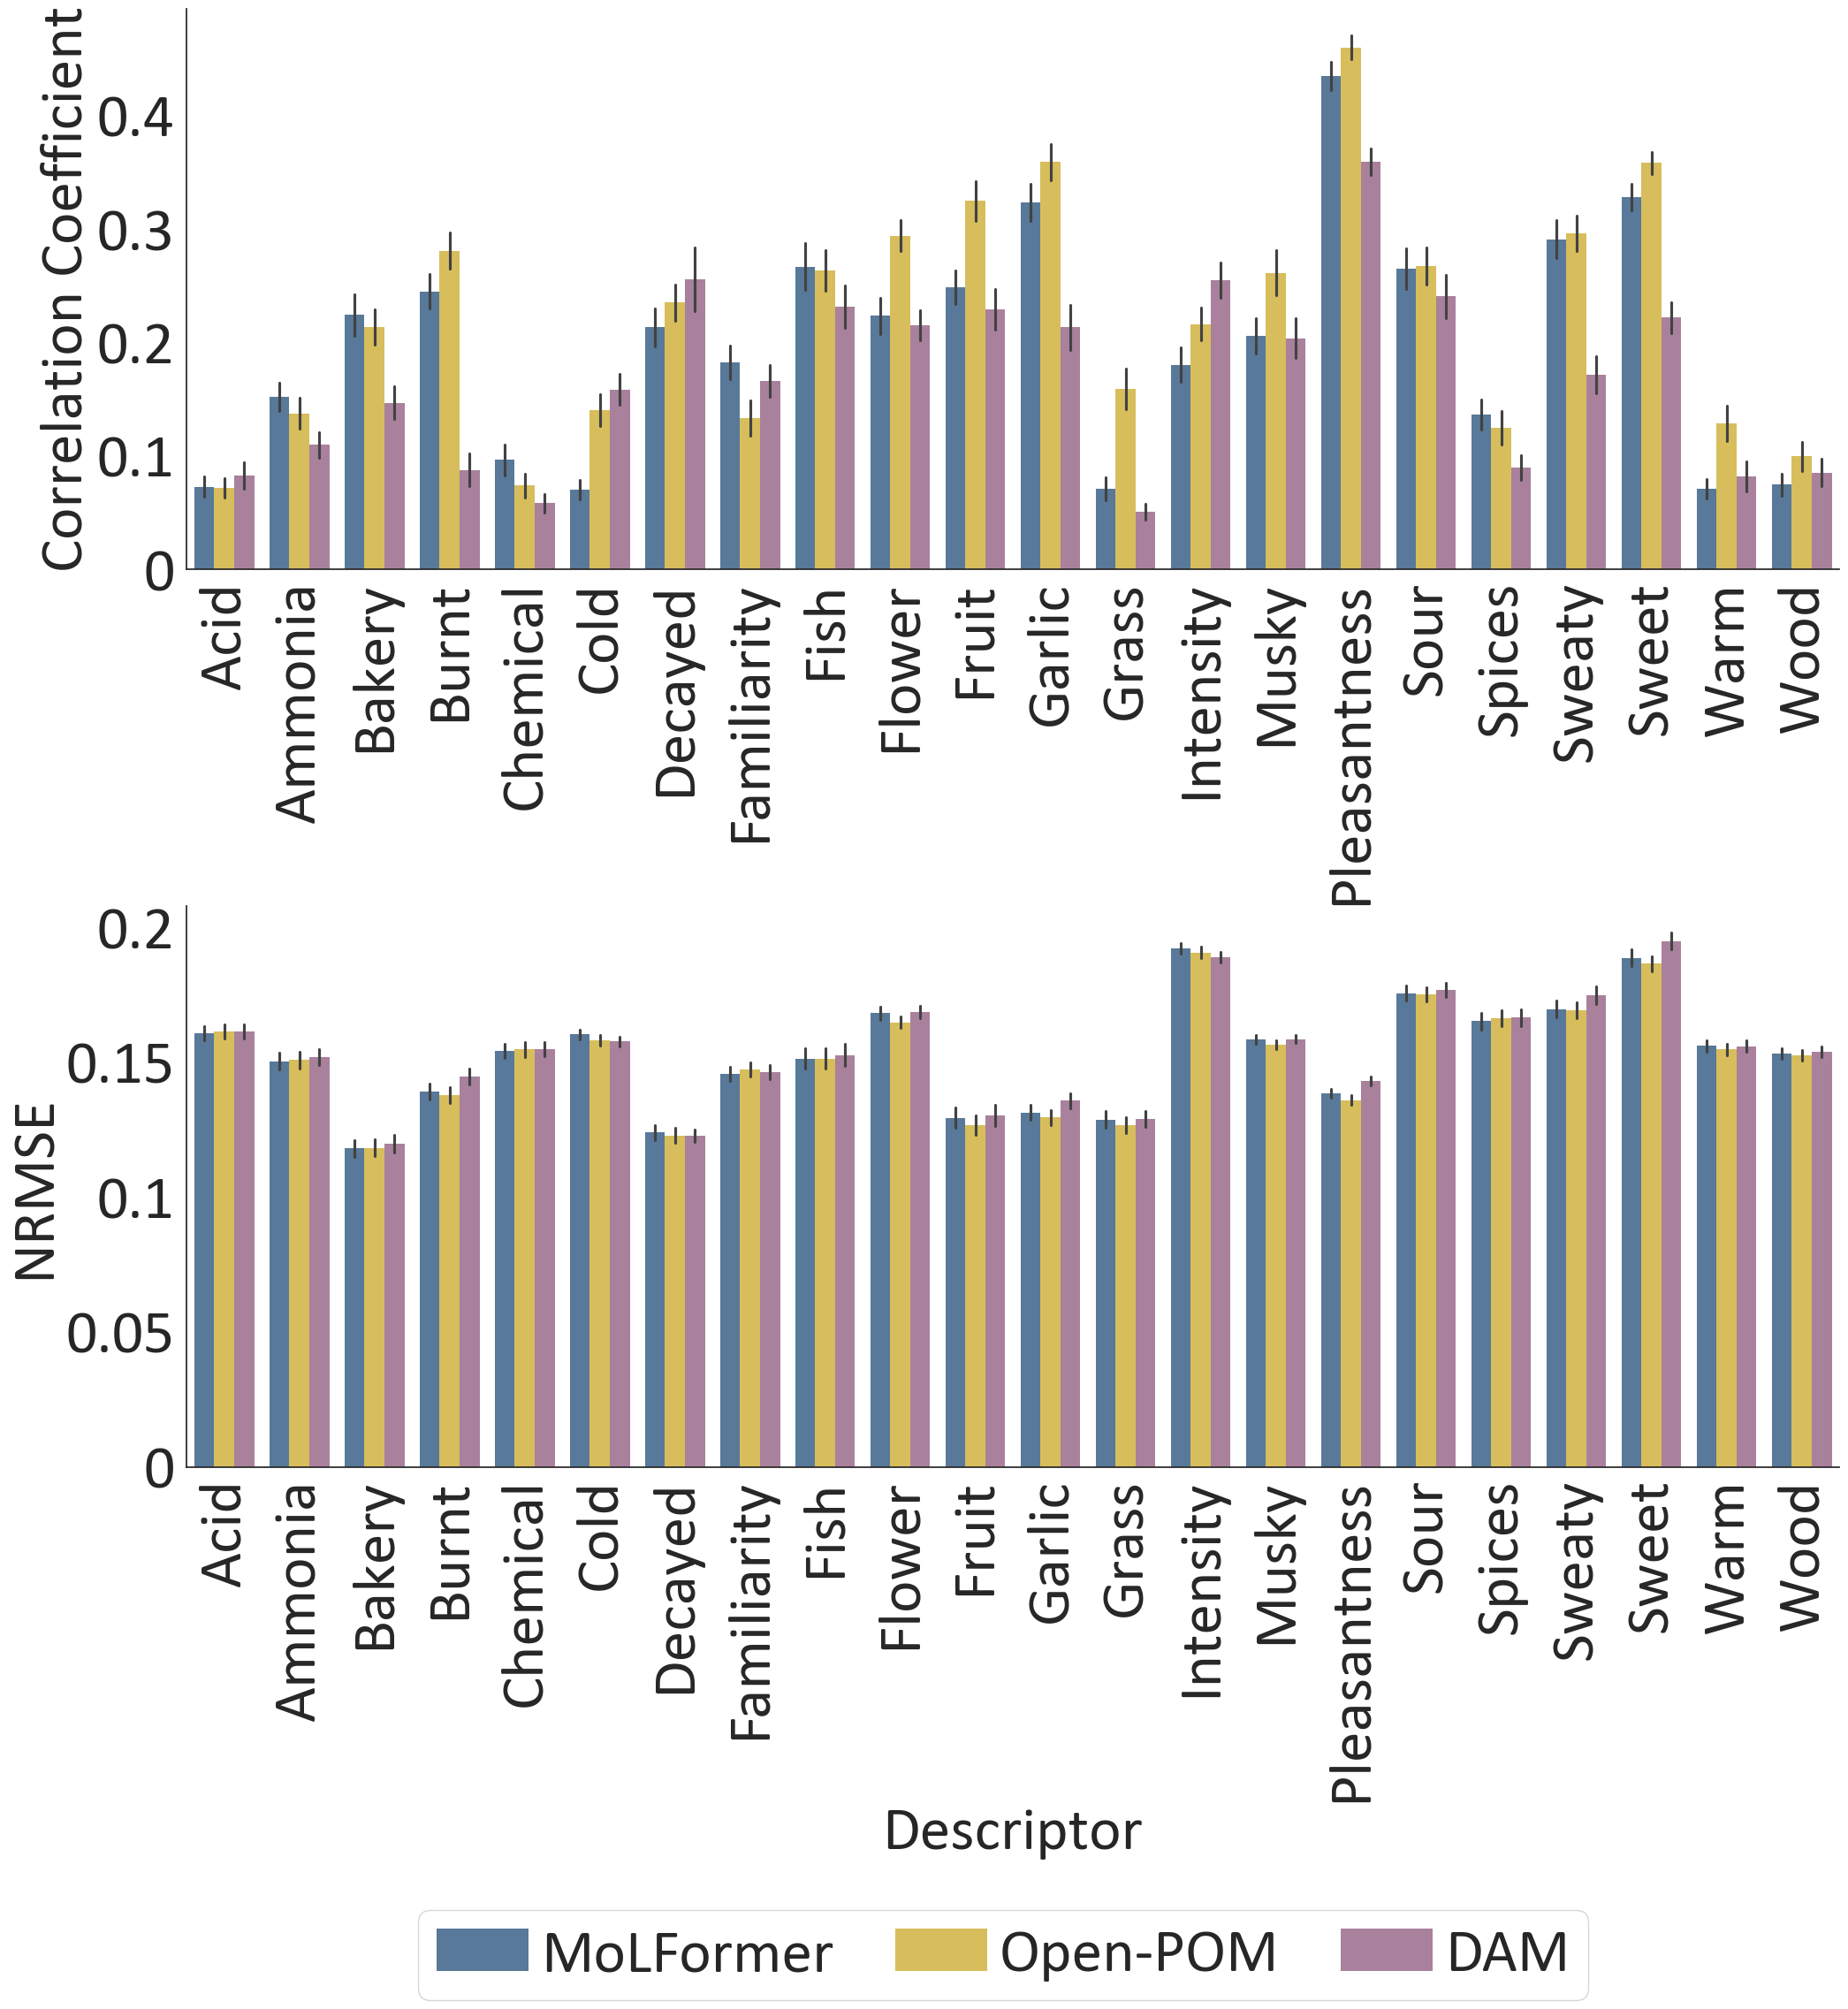

In [11]:
post_process_dataframe(df_keller_corrs_molfomer,df_keller_mses_molfomer,None,None,df_keller_cor_pom,df_keller_mse_pom,df_keller_cor_alva,df_keller_mse_alva,keller_tasks,"figs/camera_ready/keller_regression",width=None,linewidth=0,fontsize=50)

In [12]:

input_file_sagar = base_path+'curated_datasets/mols_datasets/curated_sagar_subjects_nonaminus.csv' # or new downloaded fil
df_sagar_temp=pd.read_csv(input_file_sagar)

In [13]:
# corrs_molfomer,mses_molformer,df_keller_cor_pom,df_keller_mse_pom,df_keller_cor_alva,df_keller_mse_alva =compute_correlation_keller(times , n_components,per_descritor=False)
df_sagar_cor_pom=pd.read_csv(base_path+results_path+"df_sagar_cor_pom.csv")
df_sagar_mse_pom=pd.read_csv(base_path+results_path+"df_sagar_mse_pom.csv")
df_sagar_cor_alva=pd.read_csv(base_path+results_path+"df_sagar_cor_alva.csv")
df_sagar_mse_alva=pd.read_csv(base_path+results_path+"df_sagar_mse_alva.csv")
df_sagar_corrs_molfomer=pd.read_csv(base_path+results_path+"df_sagar_corrs_molfomer.csv")
df_sagar_mses_molfomer=pd.read_csv(base_path+results_path+"df_sagar_mses_molfomer.csv")
df_sagar_corrs_molfomerfinetuned=pd.read_csv(base_path+results_path+"df_sagar_corrs_molfomerfinetuned.csv")
df_sagar_mses_molfomerfinetuned=pd.read_csv(base_path+results_path+"df_sagar_mses_molfomerfinetuned.csv")


In [14]:
min_max_sagar = pd.read_csv(base_path+results_path+"sagar_min_max.csv")
df_sagar_mse_pom=normalize_rmse(df_sagar_mse_pom,min_max_sagar,j=-1)
df_sagar_mse_alva=normalize_rmse(df_sagar_mse_alva,min_max_sagar,j=-1)
df_sagar_mses_molfomer=normalize_rmse(df_sagar_mses_molfomer,min_max_sagar,j=-2)
df_sagar_mses_molfomerfinetuned=normalize_rmse(df_sagar_mses_molfomerfinetuned,min_max_sagar,j=-2)


['molformer', 'molformerfinetuned', 'pom', 'alva']


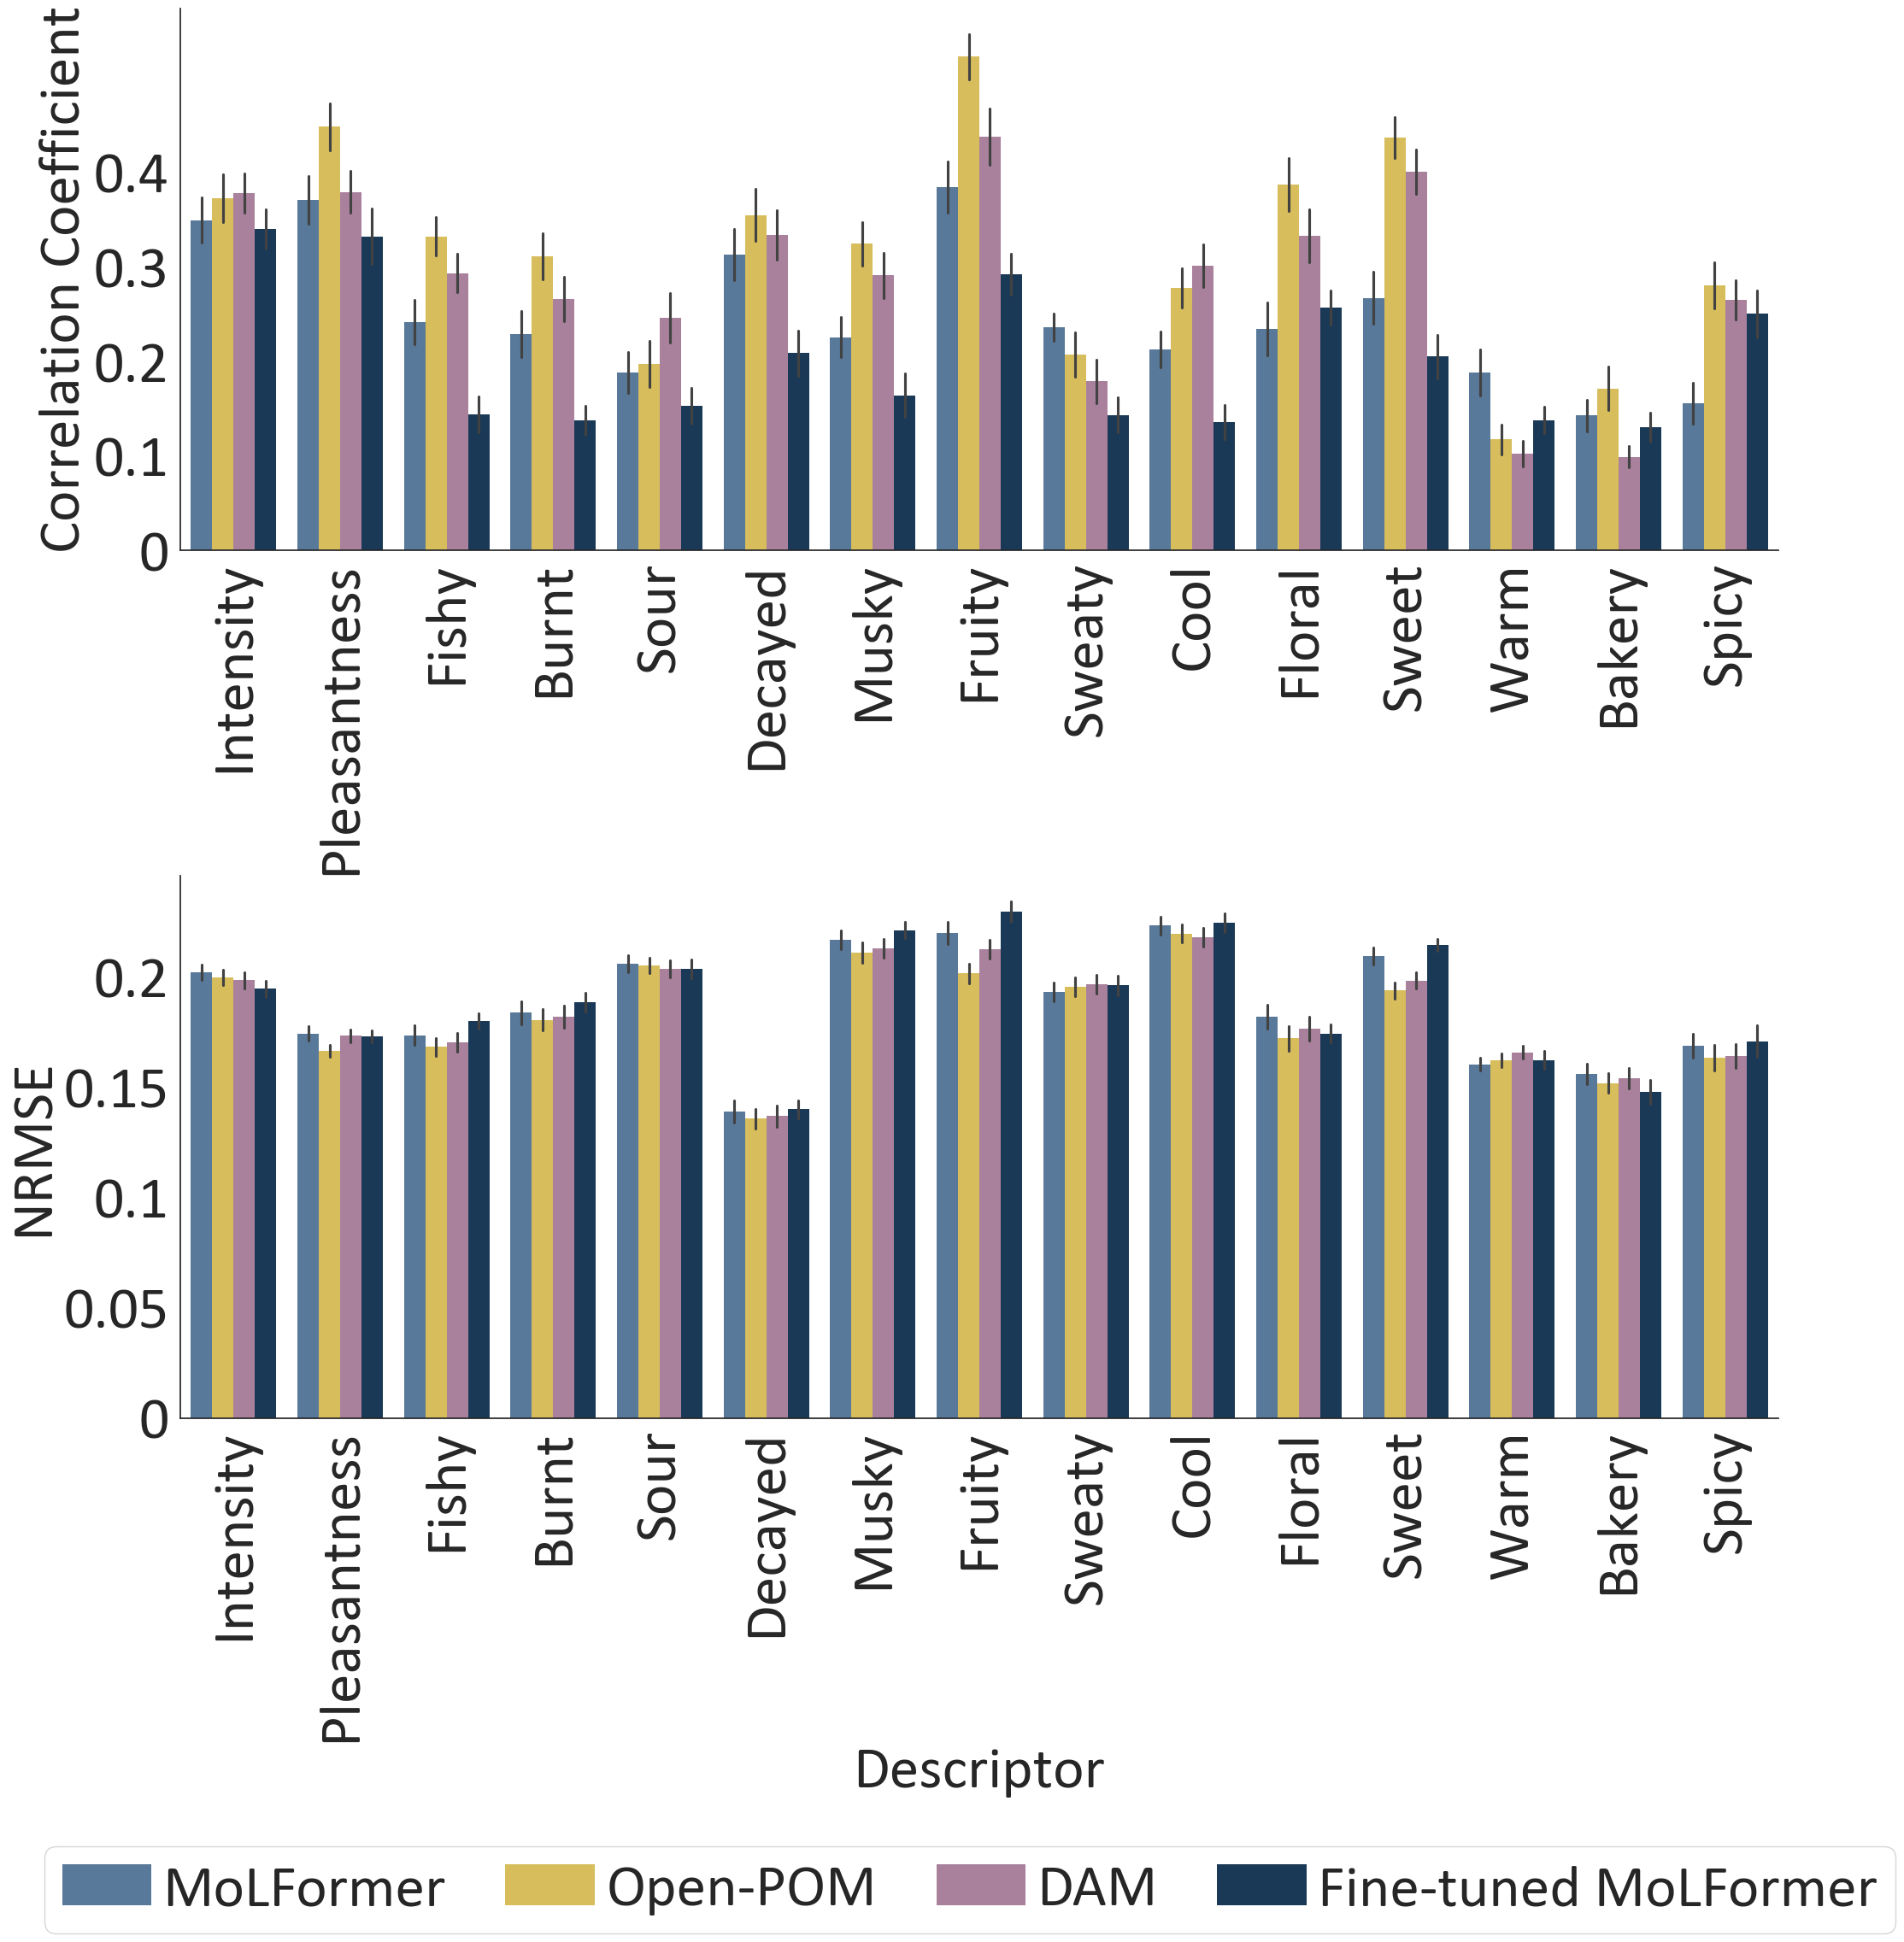

In [15]:
trend_learning_molformer_sagar = post_process_dataframe(df_sagar_corrs_molfomer,df_sagar_mses_molfomer,df_sagar_corrs_molfomerfinetuned,df_sagar_mses_molfomerfinetuned,df_sagar_cor_pom,df_sagar_mse_pom,df_sagar_cor_alva,df_sagar_mse_alva,sagar_tasks,"figs/camera_ready/sagar_regression_finetune",width=None,linewidth=0,fontsize=50)

['molformer', 'pom', 'alva']


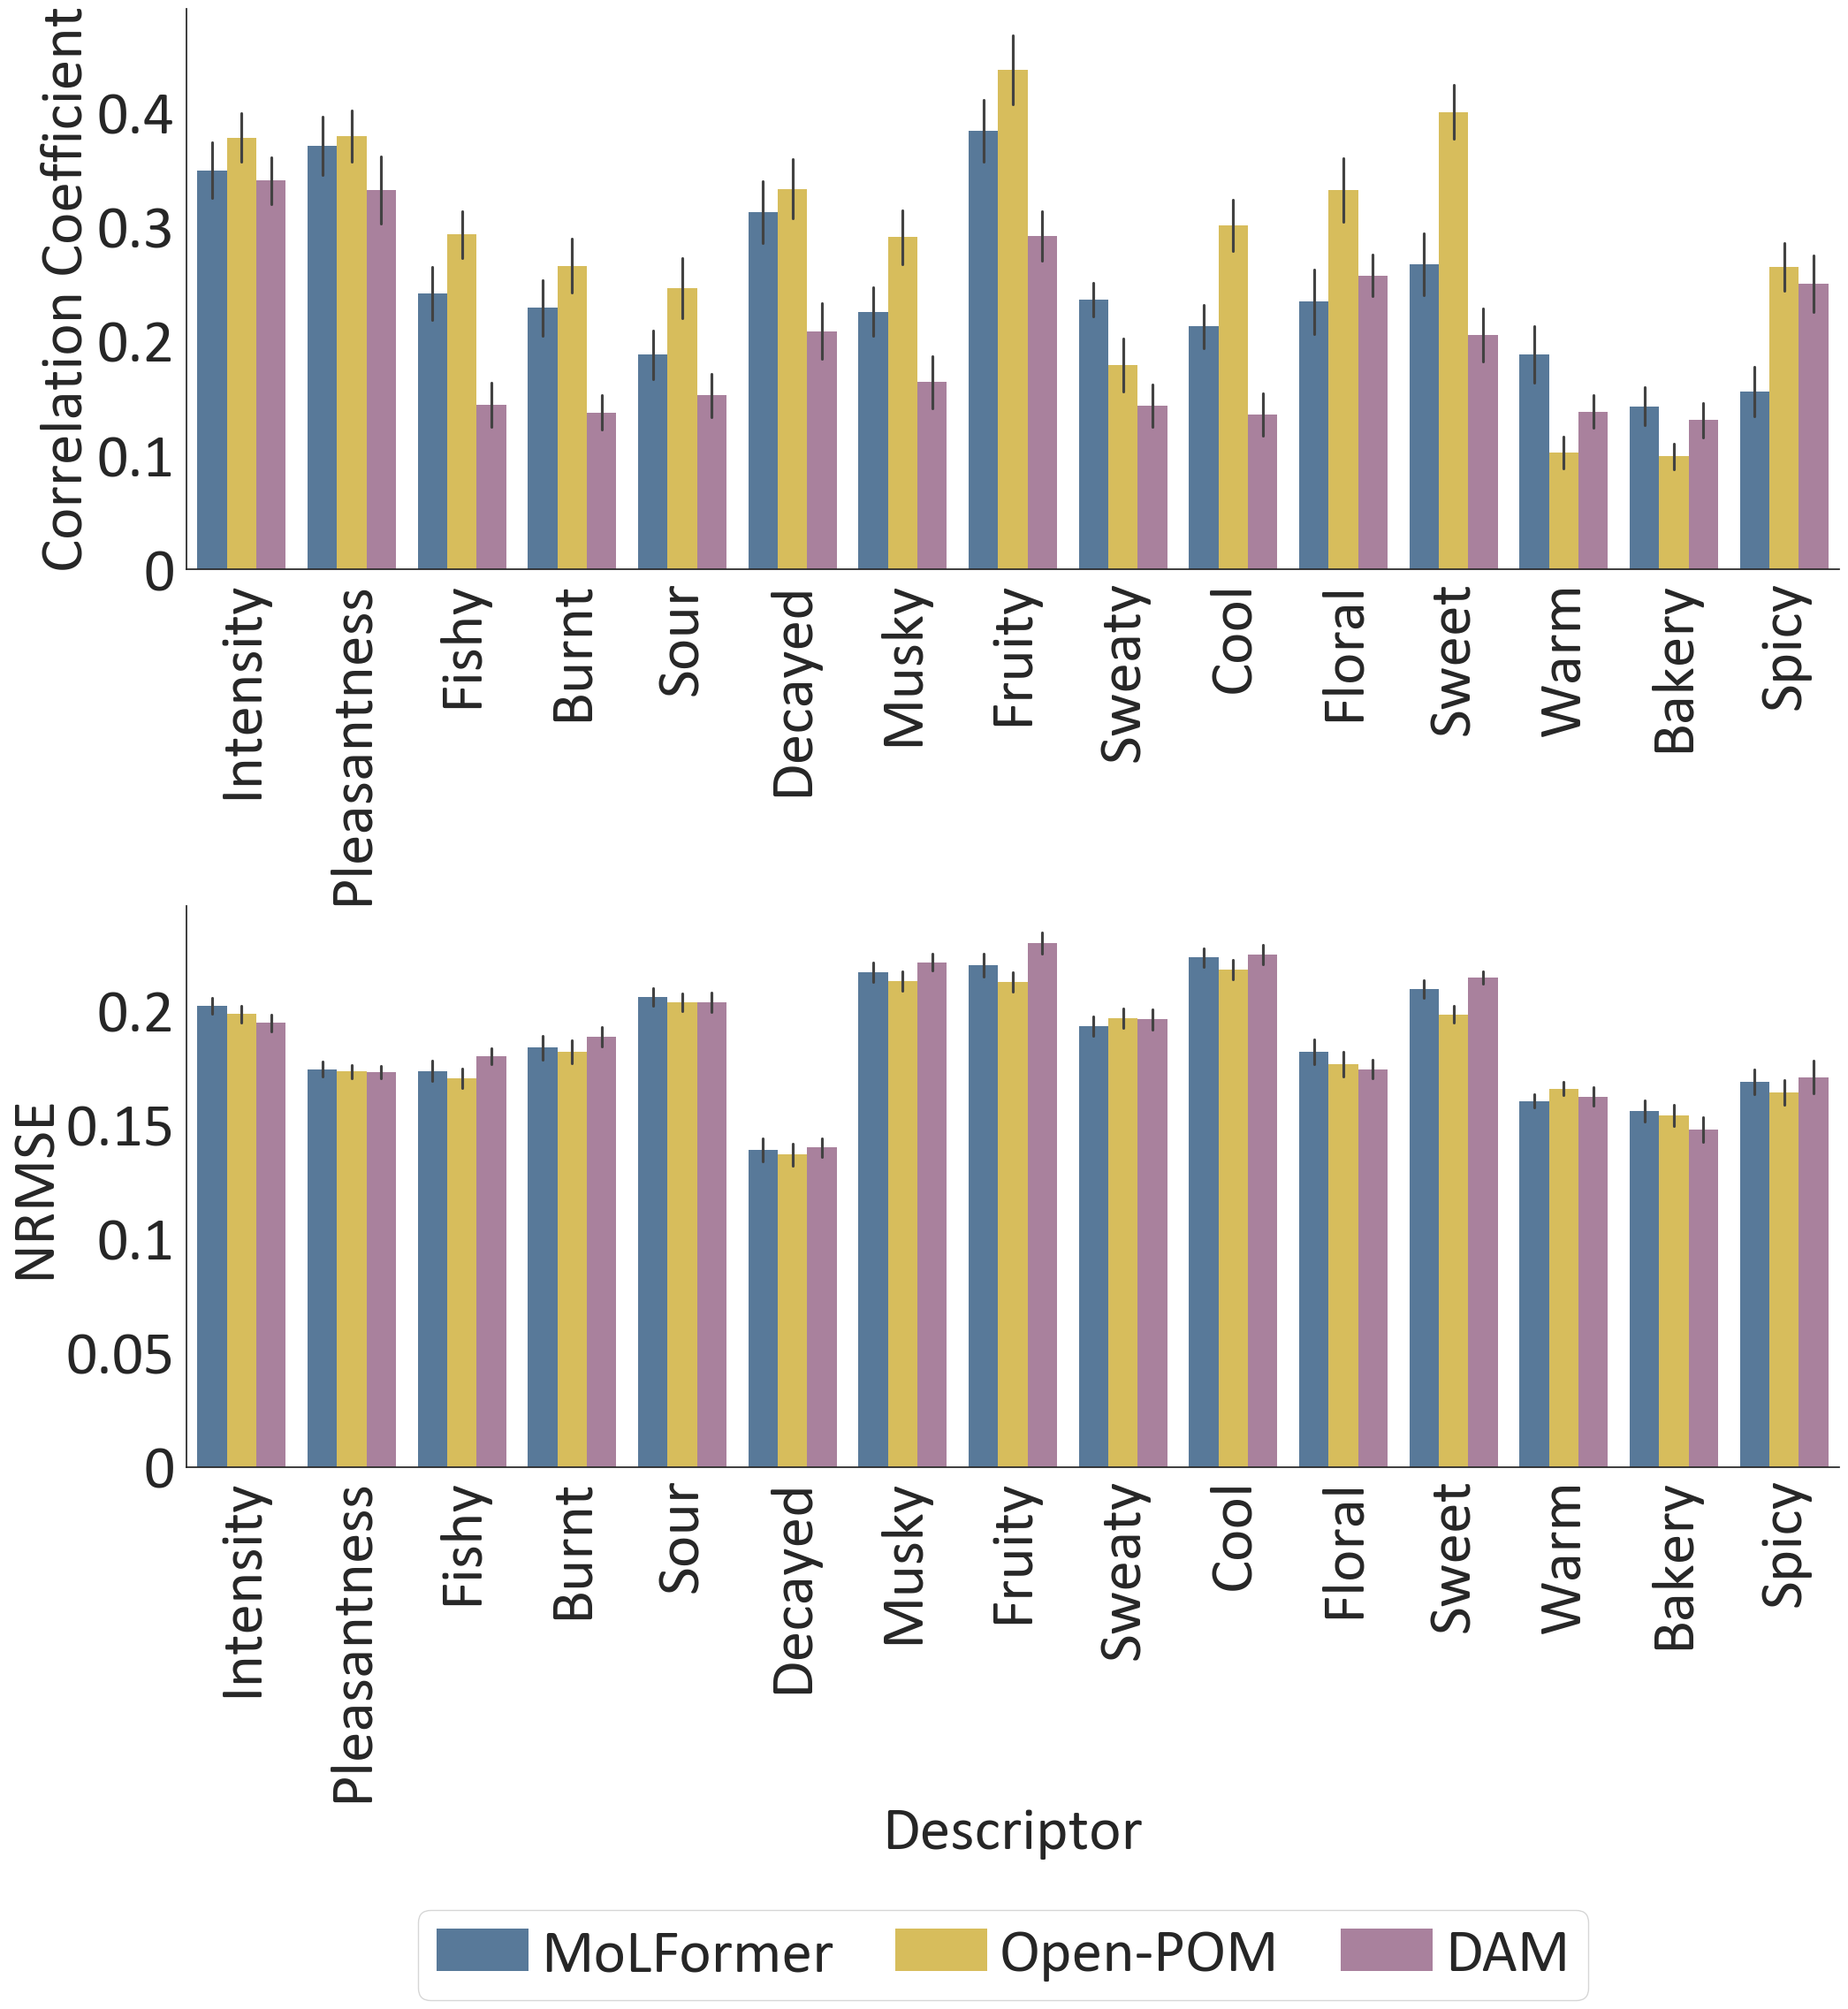

In [16]:
trend_learning_molformer_sagar = post_process_dataframe(df_sagar_corrs_molfomer,df_sagar_mses_molfomer,None,None,df_sagar_cor_pom,df_sagar_mse_pom,df_sagar_cor_alva,df_sagar_mse_alva,sagar_tasks,"figs/camera_ready/sagar_regression",width=None,linewidth=0,fontsize=50)